In [26]:
#Importing libraries                                                                                                                                import pandas as pd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import netCDF4
import pandas as pd
import datetime
import scipy
import math
import matplotlib
import matplotlib.image as mpimg
from scipy import interpolate
import matplotlib.dates as mdates
from scipy.stats import *
import locale
import time
locale.getlocale()
# locale.setlocale(locale.LC_TIME,'en_US.)
locale.setlocale(locale.LC_TIME,'en_US.utf8')
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
print(time.strftime("%d-%b-%Y"))

21-Jul-2022


In [27]:
#functions
def Language(g):
    global tunits,labeltM1,labelTS1,tlabel,Name
    if g=='RU':
        tunits='Температура °C'
        labeltM1='WRF'
        labelTS1='наблюдение'  
        tlabel='Время суток'
        Name='NameRU'
        #locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
    elif g=='EN':
        tunits='Temperature °C' 
        labeltM1='WRF Data sfc'
        labelTS1='Observation'     
        tlabel='Hour'
        Name='Name'
        locale.setlocale(locale.LC_TIME,'en_US.utf8')
def GeneratingListOfVariables(file_nc):
    nc = netCDF4.Dataset(file_nc,'r+')
    #print(nc.variables.items())
    times = nc.variables['time']
    #print(times)
    jd = netCDF4.num2date(times[:],times.units)
    nc.close
    variables=list(nc.variables.keys())[3::]
    return nc.variables,variables
def Graphercore(i,Variable,vari):
            lat=np.array(Variable['lat'])
            lon=np.array(Variable['lon'])
            Coord2= np.argmin(np.abs(lon - LOND[i]))
            Coord1= np.argmin(np.abs(lat - LATD[i]))
            print(lat[Coord1],lon[Coord2],'Lee coordinates')
            Var=np.array(Variable[vari])
            Var=Variable[vari][:,Coord1,Coord2]
            if vari in ['tmpprs','tmpsfc','tm']:
                Var=Var-273.15
                units='Temperature (°C)'
            #date=Variable['time'].units.replace('minutes since ','')
            jd=pd.date_range(date,periods=len(Variable['time']),freq='H',name='Date')
            hs = pd.Series(Var,name=vari,index=jd) 
            return hs

# Before Beginning

1. Choose the language

In [28]:
LANG='EN'
Language(LANG)


In [29]:
date='2016-05-09 19:00';Date1='2016-05-10';Date2='2016-05-12';Date='20160501';Date3='2016-05-12 22:00'
date='2016-06-26 19:00';Date1='2016-06-27';Date2='2016-06-29';Date='20160627';Date3='2016-06-29 22:00'
date='2017-07-27 19:00';Date1='2017-07-28';Date2='2017-07-30';Date='20170728';Date3='2017-07-30 22:00'
date='2018-07-12 19:00';Date1='2018-07-13';Date2='2018-07-15';Date='20180713';Date3='2018-07-15 22:00'
date='2018-08-24 19:00';Date1='2018-08-25';Date2='2018-08-27';Date='20180825';Date3='2018-08-27 22:00'
date='2019-08-25 19:00';Date1='2019-08-26';Date2='2019-08-28';Date='20190826';Date3='2019-08-28 21:00'
#date='2020-02-10 19:00';Date1='2020-02-11';Date2='2020-02-13';Date='20200210';Date3='2020-02-13 21:00'
path3='/home/usuario/Desktop/imagesTobeerased/'

LON=[-75.17327778,
  -74.209,
  -74.96047222,
  -74.83425,
  -75.74491667,
  -75.50713889,
  -74.02216667,
  -75.64502778,
  -75.08152778]
LAT=[4.87055556,
  4.69141667,
  4.18813889,
  4.76072222,
  4.76191667,
  5.08525,
  5.08644444,
  1.733,
  3.13305556]
#Stations=[21255170,21206990,21185090,21255160,26135300,26155230,21206930,44035040,21115180]
ymin=0
ymax=41
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')

'ru_RU.UTF-8'

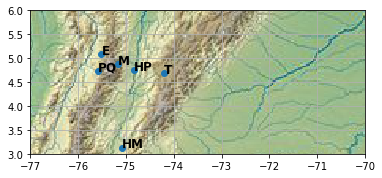

,Name,Longitude,Latitude,Altitude
21255170,Murillo,-75.17,4.87,323
21206990,Tibaitata,-74.21,4.69,2543
21255160,Hacienda Pajonales,-74.83,4.76,277
26135300,Pnn Quimbaya,-75.58,4.73,1881
26155230,Emas,-75.51,5.09,2211
21115180,Hacienda Manila,-75.08,3.13,600


In [30]:
LATD=[]
LOND=[]
ALTD=[]
NAME=[]
Stations=[21255170,21206990,21255160,26135300,26155230,21115180]
# Stations=[21145080,32075050]
for i in range(len(Stations)):
    i
    COD=Stations[i]
    St=pd.read_csv('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/DATA/DataProcessing/Stations.csv')#Opening file with coordinates of Stations
    NAME.append(str.title(St[St['Station']==COD]['Name'].values[0]))
    LATD.append(round(St.latitud[St['Station']==COD].values[0],2))
    LOND.append(round(-St[St['Station']==COD]['longitud'].values[0],2))
    ALTD.append(St[St['Station']==COD]['altitud'].values[0])
ST=pd.DataFrame({'Name':NAME,'Longitude':LOND,'Latitude':LATD,'Altitude':ALTD},index=Stations)
# F = [chr(ord('a') + x).upper() for x in ST.index]
ST.to_csv('StationsERAValidation.csv')
fig,ax=plt.subplots()
ax.imshow(mpimg.imread('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/WRFValidation/Colombia_relief_location_map.jpg'),extent=(-85.12,-66.44,-4.6,16.6))
plt.ylim([3,6])
plt.xlim([-77,-70])
plt.grid()
#LONN=[str(-x)+' W' for x in LON]
#ax.set_xticklabels(LONN)
for i, txt in enumerate(NAME):
    f=''.join(c for c in str(txt) if c.isupper())
    ax.annotate(f, (LOND[i], LATD[i]),color='black',weight='bold',fontsize=12)
ax.scatter(LOND,LATD,label='Data Stations')
# ax.scatter(LOND[0],LATD[0],label='Data Stations')#Just for onem station
# ax.scatter(LON,LAT,label='ERA 5')
# ax=fig.gca()
#plt.legend()
plt.show()
LON
ST

In [31]:

ST['NameRU']=['Мурильо','Тибайтата','Асиенда Пахоналес','Пнн Кимбайя','Эмас','Асиенда Манила']
ST

,Name,Longitude,Latitude,Altitude,NameRU
21255170,Murillo,-75.17,4.87,323,Мурильо
21206990,Tibaitata,-74.21,4.69,2543,Тибайтата
21255160,Hacienda Pajonales,-74.83,4.76,277,Асиенда Пахоналес
26135300,Pnn Quimbaya,-75.58,4.73,1881,Пнн Кимбайя
26155230,Emas,-75.51,5.09,2211,Эмас
21115180,Hacienda Manila,-75.08,3.13,600,Асиенда Манила


In [32]:
def Plotting(i):
    Language(LANG)
    Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
    Variable='TA2_AUT_60@'
    StationT=str(Stations[i])
    TS=pd.read_csv(Path+Variable+StationT+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Station Data'],index_col='time')
    Variable='TA10_MX_D@'
    path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/WRF/'
    file1 = '/TM.nc' 
    fn1=path+Date+file1
    Variables,variables=GeneratingListOfVariables(fn1)
    Variables
    vari='tm'
    Variables
    TM1=Graphercore(i,Variables,vari) 
    fig, ax = plt.subplots() 
    ax.set_ylim([ymin, ymax])
    TM1.plot(ylabel=tunits,ax=ax,label='WRF Data sfc')
    TS.plot(ax=ax,label='Station Data',xlim=[Date1,Date3])
    ax.legend(loc='best'    ,bbox_to_anchor=(1., 1.12))
    ax.get_legend().remove()
    ax.set_xlabel(tlabel)
    ST.loc[int(StationT),[r'$\rho$']]=round(TM1.corr(TS[Date1:Date2]['Station Data']),2)
    string=Date+'T2M'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
    print(ST.loc[Stations[i]])
    x=TM1[Date1:Date3];y=TS[Date1:Date3].dropna()
    hh=x[x.index.isin(y.index)==True]
    x=TM1[Date1:Date3];y=TS[Date1:Date3]
    hh=x[x.index.isin(y.index)==True]
    MAE=round(np.nansum(abs(hh.to_numpy()-y.to_numpy().T))/len(y),2)
    MBE=round(np.nansum(hh.to_numpy()-y.to_numpy().T)/len(y),2)
    ST.loc[int(StationT),['MAE']]=MAE
    ST.loc[int(StationT),['MBE']]=MBE
    fig2, ax2 = plt.subplots()
    ax2.set_xlabel(tunits);ax2.set_ylabel(tunits)
    ax2.scatter(hh,y,label=ST.loc[Stations[i]][Name])
    plt.legend()
    string=Date+'T2M'+'Scatter'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""))
    plt.show()
    rho=TM1.corr(TS[Date1:Date2]['Station Data'])
    n=len(TS[Date1:Date3])-2
    tSt=rho*math.sqrt(n-2)/math.sqrt(1-rho**2)
    pval = t.sf(np.abs(tSt), n)*2
    ST.loc[int(StationT),[r'$p_{val}$']]=str(pval)[0:4]+str(pval)[-4::]
def Plotting2(i):
    Language(LANG)
    Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
    Variable='TA2_AUT_60@'
    StationT=str(Stations[i])
    TS=pd.read_csv(Path+Variable+StationT+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Station Data'],index_col='time')
    path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/WRF/'
    file1 = '/TM.nc' 
    fn1=path+Date+file1
    Variables,variables=GeneratingListOfVariables(fn1)
    vari='tm'
    Variables
    TM1=Graphercore(i,Variables,vari) 
    fig, ax = plt.subplots()
    ax.set_ylim([ymin, ymax])
    TM1.plot(ylabel=tunits,ax=ax,label='WRF Data sfc')
    TS[Date1:Date2].plot(ax=ax,xlim=[Date1,Date3])
    ax.set_xlabel(tlabel)
    ax.legend(loc='best',bbox_to_anchor=(1., 1.12))
    ax.get_legend().remove()
    string=Date+'T2M'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
    TM1.corr(TS[Date1:Date2]['Station Data'])
    ST.loc[int(StationT),[r'$\rho$']]=round(TM1.corr(TS[Date1:Date2]['Station Data']),2)
    print(ST.loc[Stations[i]])
    x=TM1[Date1:Date3];y=TS[Date1:Date3].dropna()
    hh=x[x.index.isin(y.index)==True]
    x=TM1[Date1:Date3];y=TS[Date1:Date3]
    hh=x[x.index.isin(y.index)==True]
    MAE=round(np.nansum(abs(hh.to_numpy()-y.to_numpy().T))/len(y),2)
    MBE=round(np.nansum(hh.to_numpy()-y.to_numpy().T)/len(y),2)
    ST.loc[int(StationT),['MAE']]=MAE
    ST.loc[int(StationT),['MBE']]=MBE
    ST.loc[int(StationT),['MAE']]=MAE
    ST.loc[int(StationT),['MBE']]=MBE
    fig2, ax2 = plt.subplots()
    ax2.set_xlabel(tunits);ax2.set_ylabel(tunits)
    ax2.scatter(hh,y,label=ST.loc[Stations[i]][Name])
    plt.legend()
    string=Date+'T2M'+'Scatter'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""))
    plt.show()
    rho=TM1.corr(TS[Date1:Date2]['Station Data'])
    n=len(TS[Date1:Date3])-2
    tSt=rho*math.sqrt(n-2)/math.sqrt(1-rho**2)
    pval = t.sf(np.abs(tSt), n)*2
    ST.loc[int(StationT),[r'$p_{val}$']]=str(pval)[0:4]+str(pval)[-4::]


3.1088 -75.1012508361204 Lee coordinates


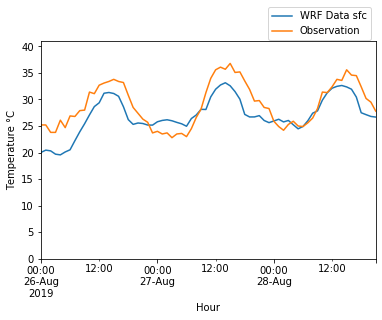

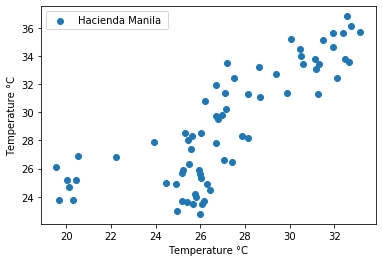

2.65

In [33]:
#Charging files
Language(LANG)
Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
Variable='TA2_AUT_60@'
i=5
StationT=str(Stations[i])
TS=pd.read_csv(Path+Variable+StationT+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Station Data'],index_col='time')
path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/WRF/'
file1 = '/TM.nc' 
fn1=path+Date+file1
Variables,variables=GeneratingListOfVariables(fn1)
vari='tm'
TM1=Graphercore(i,Variables,vari) 
Plotting
fig, ax = plt.subplots()
ax.set_ylim([ymin, ymax])
TM1.plot(ylabel=tunits,ax=ax,label=labeltM1)
TS[Date1:Date2].plot(ax=ax,label=labelTS1,xlim=[Date1,Date3])
ax.legend([labeltM1,labelTS1],loc='best',bbox_to_anchor=(1., 1.18))
ax.set_xlabel(tlabel)
ST.loc[int(StationT),[r'$\rho$']]=round(TM1.corr(TS[Date1:Date3]['Station Data']),2)
string=Date+'T2M'+ST.loc[Stations[i]]['Name']+'.png'
plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
rho=TM1.corr(TS[Date1:Date2]['Station Data'])
n=len(TS[Date1:Date3])-2
tSt=rho*math.sqrt(n-2)/math.sqrt(1-rho**2)
pval = t.sf(np.abs(tSt), n)*2
ST.loc[int(StationT),[r'$p_{val}$']]=str(pval)[0:4]+str(pval)[-4::]
x=TM1[Date1:Date3];y=TS[Date1:Date3].dropna()
hh=x[x.index.isin(y.index)==True]
x=TM1[Date1:Date3];y=TS[Date1:Date3]
hh=x[x.index.isin(y.index)==True]
MAE=round(np.nansum(abs(hh.to_numpy()-y.to_numpy().T))/len(y),2)
MBE=round(np.nansum(hh.to_numpy()-y.to_numpy().T)/len(y),2)
ST.loc[int(StationT),['MAE']]=MAE
ST.loc[int(StationT),['MBE']]=MBE
fig2, ax2 = plt.subplots()
ax2.set_xlabel(tunits);ax2.set_ylabel(tunits)
ax2.scatter(hh,y,label=ST.loc[Stations[i]][Name])
plt.legend()
string=Date+'T2M'+'Scatter'+ST.loc[Stations[i]]['Name']+'.png'
plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
plt.show()
Variables
djdk=hh.corr(y['Station Data'])
ST
hh.to_numpy()-y.to_numpy().T
MAE

4.8651 -75.19153846153847 Lee coordinates
Name         Murillo 
Longitude      -75.17
Latitude         4.87
Altitude          323
NameRU        Мурильо
$\rho$           0.91
$p_{val}$    7.07e-27
MAE              1.62
MBE              0.79
Name: 21255170, dtype: object


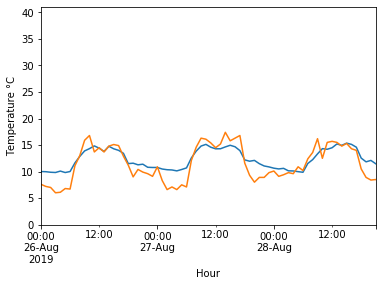

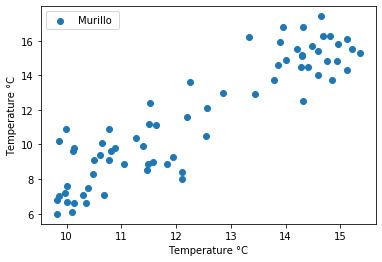

4.6851 -74.1983745819398 Lee coordinates
Name         Tibaitata 
Longitude        -74.21
Latitude           4.69
Altitude           2543
NameRU        Тибайтата
$\rho$             0.92
$p_{val}$      4.47e-29
MAE                1.56
MBE                1.04
Name: 21206990, dtype: object


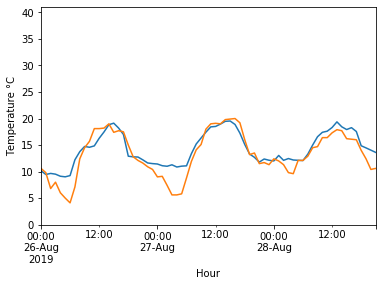

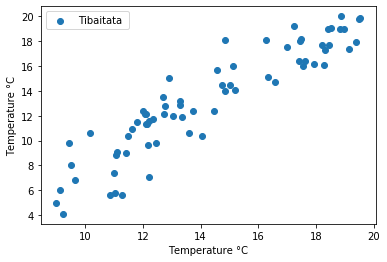

4.7301 -75.59783277591974 Lee coordinates
Name         Pnn Quimbaya 
Longitude           -75.58
Latitude              4.73
Altitude              1881
NameRU         Пнн Кимбайя
$\rho$                0.95
$p_{val}$         1.67e-35
MAE                    2.9
MBE                  -0.22
Name: 26135300, dtype: object


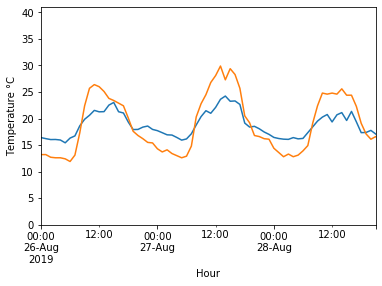

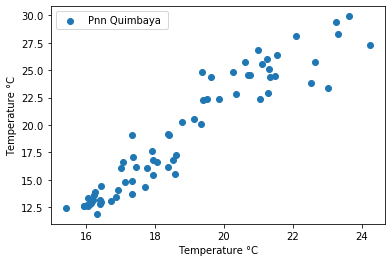

3.1088 -75.1012508361204 Lee coordinates
Name         Hacienda Manila 
Longitude              -75.08
Latitude                 3.13
Altitude                  600
NameRU         Асиенда Манила
$\rho$                   0.81
$p_{val}$            8.49e-17
MAE                      2.65
MBE                     -1.94
Name: 21115180, dtype: object


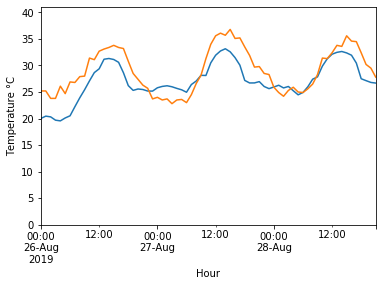

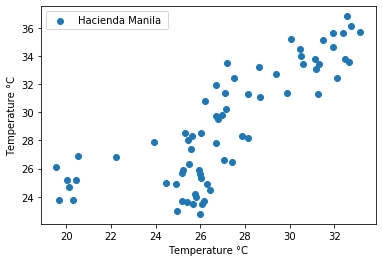

In [41]:
Plotting2(0)
Plotting2(1)
# Plotting2(2)
Plotting2(3)
Plotting2(5)



#  Statistical Indicators

In [42]:
ST

,Name,Longitude,Latitude,Altitude,NameRU,$\rho$,$p_{val}$,MAE,MBE
21255170,Murillo,-75.17,4.87,323,Мурильо,0.91,7.07e-27,1.62,0.79
21206990,Tibaitata,-74.21,4.69,2543,Тибайтата,0.92,4.47e-29,1.56,1.04
21255160,Hacienda Pajonales,-74.83,4.76,277,Асиенда Пахоналес,NaN,NaN,NaN,NaN
26135300,Pnn Quimbaya,-75.58,4.73,1881,Пнн Кимбайя,0.95,1.67e-35,2.90,-0.22
26155230,Emas,-75.51,5.09,2211,Эмас,NaN,NaN,NaN,NaN
21115180,Hacienda Manila,-75.08,3.13,600,Асиенда Манила,0.81,8.49e-17,2.65,-1.94


4.7301 -75.59783277591974 Lee coordinates
Name         Pnn Quimbaya 
Longitude           -75.58
Latitude              4.73
Altitude              1881
NameRU         Пнн Кимбайя
$\rho$                0.95
$p_{val}$         1.67e-35
MAE                    2.9
MBE                  -0.22
Name: 26135300, dtype: object


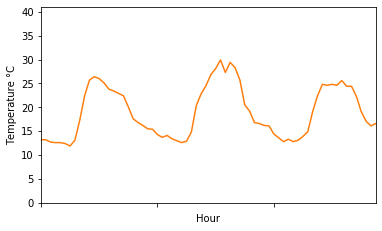

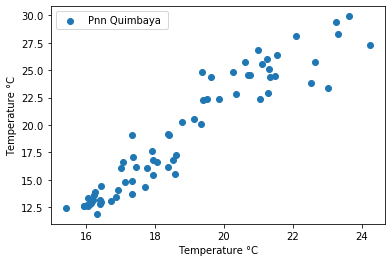

In [39]:
ST

,Name,Longitude,Latitude,Altitude,NameRU,$\rho$,$p_{val}$,MAE,MBE
21255170,Murillo,-75.17,4.87,323,Мурильо,0.91,7.07e-27,1.62,0.79
21206990,Tibaitata,-74.21,4.69,2543,Тибайтата,0.92,4.47e-29,1.56,1.04
21255160,Hacienda Pajonales,-74.83,4.76,277,Асиенда Пахоналес,NaN,NaN,NaN,NaN
26135300,Pnn Quimbaya,-75.58,4.73,1881,Пнн Кимбайя,0.95,1.67e-35,2.90,-0.22
26155230,Emas,-75.51,5.09,2211,Эмас,NaN,NaN,NaN,NaN
21115180,Hacienda Manila,-75.08,3.13,600,Асиенда Манила,0.81,8.49e-17,2.65,-1.94
